# Multivariate

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data from CSV files
path = './data/data/'
Sales = pd.read_csv(path + 'Sale.csv', na_values=r'\N')
Stores = pd.read_csv(path + 'Stores.csv', na_values=r'\N')
Geography = pd.read_csv(path + 'Geography.csv', na_values=r'\N')
Channel = pd.read_csv(path + 'Channel.csv', na_values=r'\N')
Product = pd.read_csv(path + 'Product.csv', na_values=r'\N')
ProductSubCategory = pd.read_csv(path + 'ProductSubCategory.csv', na_values=r'\N')

In [3]:
# Merge data
merged_data = Sales.merge(Stores, on=['StoreKey', 'StoreKey'], how='left')
merged_data = merged_data.merge(Geography, on='GeographyKey', how='left')
merged_data = merged_data.merge(Channel, on='ChannelKey', how='left')
merged_data = merged_data.merge(Product, on='ProductKey', how='left')
merged_data = merged_data.merge(ProductSubCategory, on='ProductSubcategoryKey', how='left')

merged_data.head()

,SalesKey,Date,channelKey,StoreKey,ProductKey,PromotionKey,UnitCost_x,UnitPrice_x,SalesQuantity,ReturnQuantity,...,ChannelType,Product Description,Manufacturer,BrandName,ClassName,UnitCost_y,UnitPrice_y,ProductSubcategoryKey,ProductSubcategory,ProductCategoryKey
0,1,01_01_2020,1,8,1605,2,112.41,339.29,9,0,...,Catalog,LuD DVD 15-Inch Player Portable L200 Black,LuminaDisc,LuminaDisc,Deluxe,112.41,339.29,35,Movie DVD,6
1,2,01_01_2020,1,3,811,2,8.88,19.31,9,0,...,Store,SY Notebook Peripheral Kit M69 Grey,"SY, Ltd",SY,Regular,8.88,19.31,22,Computers Accessories,3
2,3,01_01_2020,1,8,700,2,85.55,186.03,9,0,...,Catalog,ZenithTech Photo Ink Jet Printer M100 White,"ZenithTech, Inc.",ZenithTech,Regular,85.55,186.03,20,"Printers, Scanners & Fax",3
3,4,01_01_2020,1,3,1607,2,96.84,210.59,9,0,...,Store,LuD DVD 12-Inch Player Portable M400 Silver,LuminaDisc,LuminaDisc,Regular,96.84,210.59,35,Movie DVD,6
4,5,01_01_2020,1,11,1659,2,100.78,304.19,9,0,...,Store,SY DVD 14-Inch Player Portable L100 White,"SY, Ltd",SY,Deluxe,100.78,304.19,35,Movie DVD,6


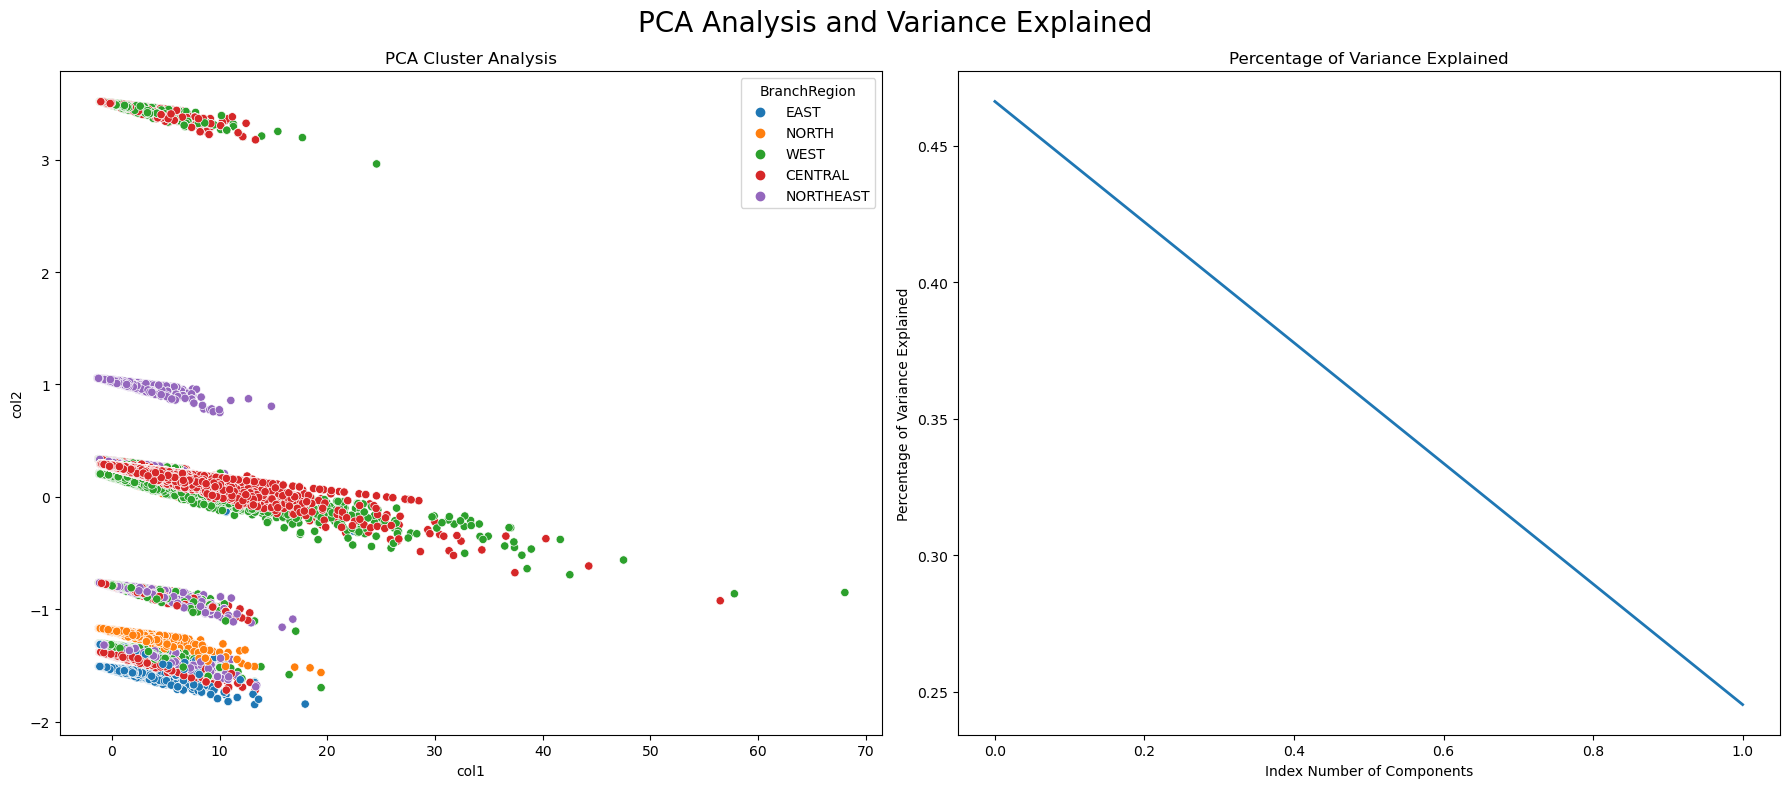

In [4]:
# Specify the columns for PCA
var = ['TotalDiscountAmount', 'TotalCost', 'SalesAmount', 'EmployeeCount', 'AreaSize']

# Standardize the data
scaler = StandardScaler()
pca_data = scaler.fit_transform(merged_data[var])

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(pca_data)
pca_data = pd.DataFrame(pca_data, columns=['col1', 'col2'])

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Combine PCA results with 'BranchRegion' column
pca_data = pd.concat([pca_data, merged_data["BranchRegion"]], axis=1)

# Scatter plot
sns.scatterplot(data=pca_data, x='col1', y='col2', hue='BranchRegion', ax=axes[0], edgecolors='none')
axes[0].set_title('PCA Cluster Analysis')

# Variance explained plot
axes[1].plot(pca.explained_variance_ratio_, linewidth=2)
axes[1].set_title('Percentage of Variance Explained')
axes[1].set_xlabel('Index Number of Components')
axes[1].set_ylabel('Percentage of Variance Explained')

fig.suptitle('PCA Analysis and Variance Explained', fontsize=20)

# Display plots
plt.tight_layout()
plt.show()


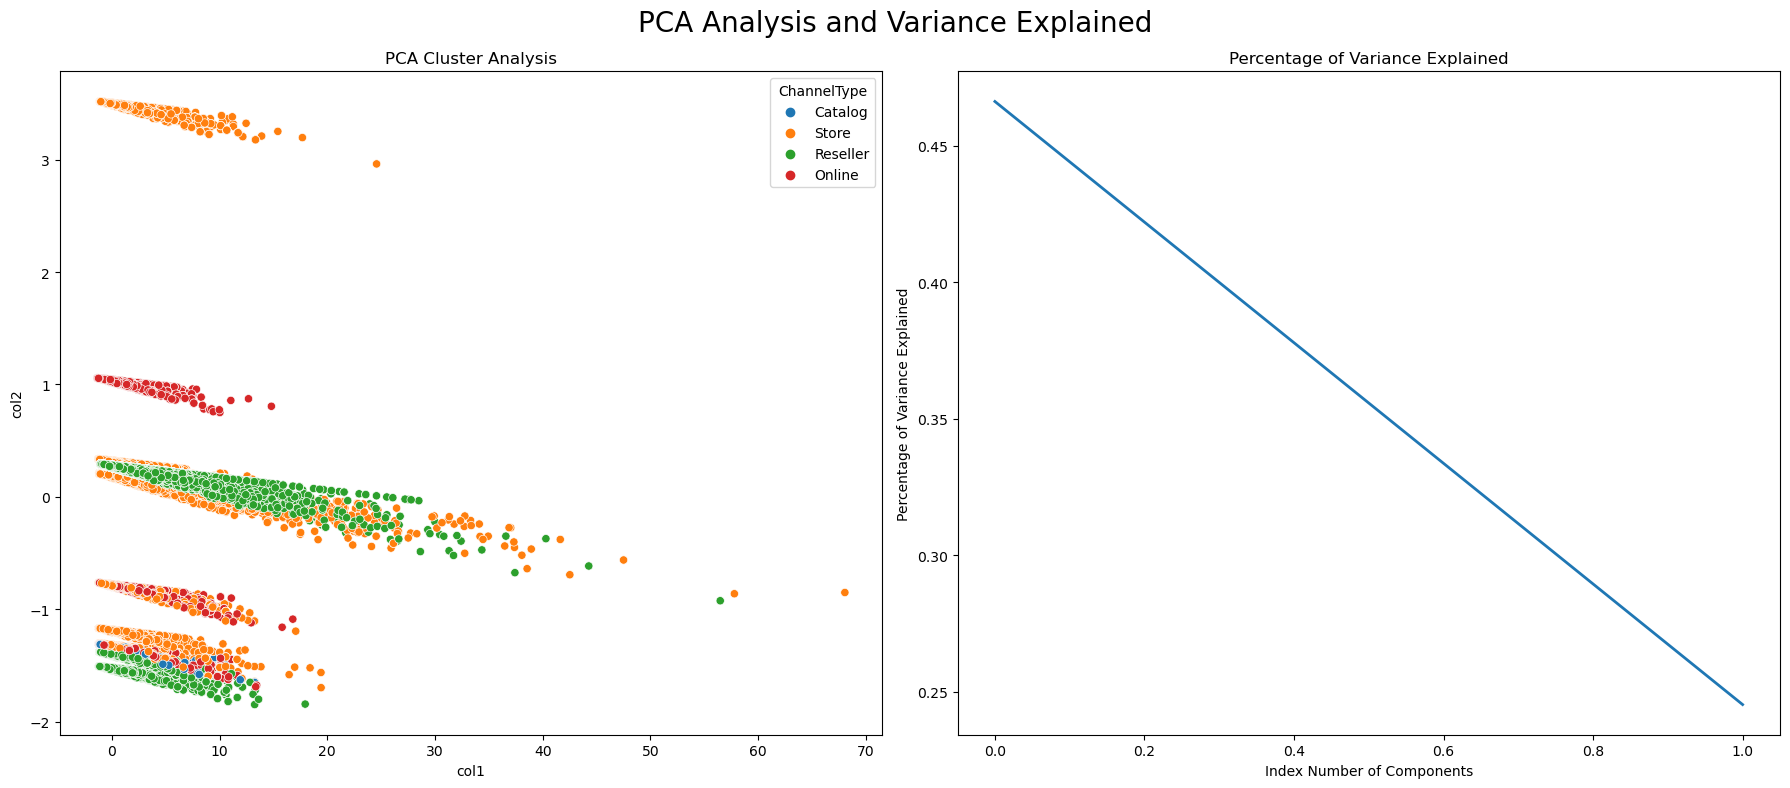

In [5]:
# Specify the columns for PCA
var = ['TotalDiscountAmount', 'TotalCost', 'SalesAmount', 'EmployeeCount', 'AreaSize']

# Standardize the data
scaler = StandardScaler()
pca_data = scaler.fit_transform(merged_data[var])

# Apply PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(pca_data)
pca_data = pd.DataFrame(pca_data, columns=['col1', 'col2'])

# Visualize results
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Combine PCA results with 'BranchRegion' column
pca_data = pd.concat([pca_data, merged_data["ChannelType"]], axis=1)

# Scatter plot
sns.scatterplot(data=pca_data, x='col1', y='col2', hue='ChannelType', ax=axes[0], edgecolors='none')
axes[0].set_title('PCA Cluster Analysis')

# Variance explained plot
axes[1].plot(pca.explained_variance_ratio_, linewidth=2)
axes[1].set_title('Percentage of Variance Explained')
axes[1].set_xlabel('Index Number of Components')
axes[1].set_ylabel('Percentage of Variance Explained')

fig.suptitle('PCA Analysis and Variance Explained', fontsize=20)

# Display plots
plt.tight_layout()
plt.show()


# Data Mining

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


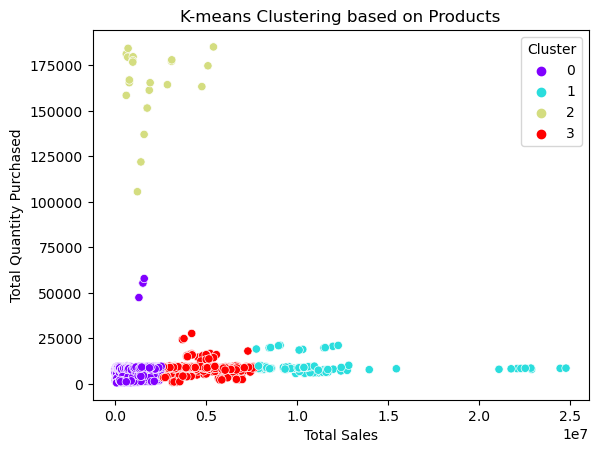

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

kmeans_data = merged_data.groupby('Product Description').agg({'SalesAmount':'sum','SalesQuantity':'sum'})

kmeans_data_scaled = scaler.fit_transform(kmeans_data)

kmeans_model = KMeans(n_clusters = 4, init='k-means++', random_state=42)
kmeans_data['Cluster'] = kmeans_model.fit_predict(kmeans_data_scaled)

scatter_plot = sns.scatterplot(x='SalesAmount', y='SalesQuantity',data=kmeans_data, hue='Cluster', palette='rainbow')
scatter_plot.set_xlabel('Total Sales')
scatter_plot.set_ylabel('Total Quantity Purchased')
scatter_plot.set_title('K-means Clustering based on Products')
scatter_plot.legend(title='Cluster')

plt.show()